<a href="https://colab.research.google.com/github/nehapatel-ctrl/Task1/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679


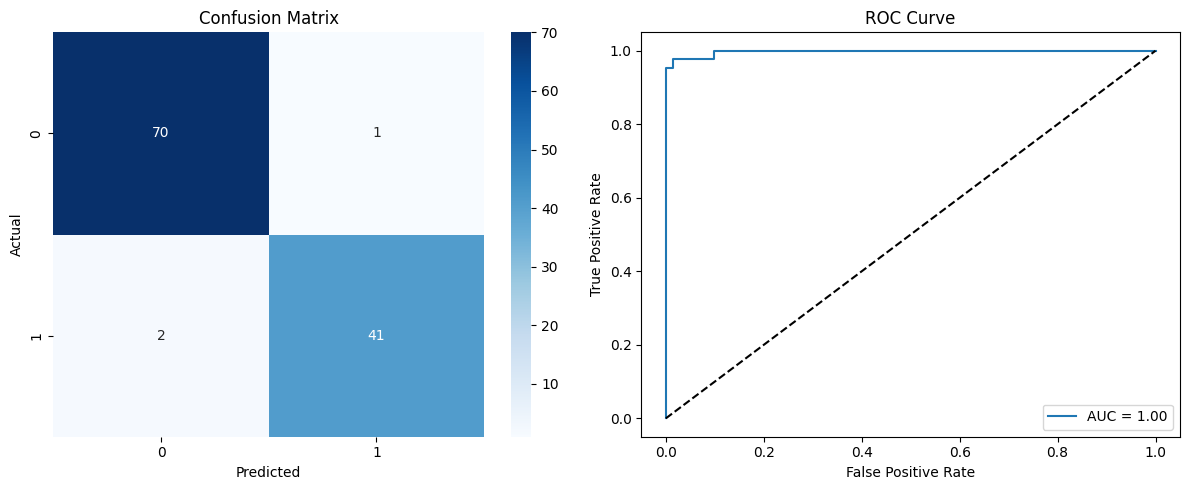


Confusion Matrix with Threshold 0.3:
 [[67  4]
 [ 1 42]]


In [5]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve
)

# Step 2: Load and prepare dataset
df = pd.read_csv("data.csv")  # Use the correct path if needed

# Drop unused columns
df = df.drop(columns=["id", "Unnamed: 32"])

# Encode target column: M = 1, B = 0
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

# Step 3: Split into features and target
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Step 7: Predict
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Step 8: Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()

# Step 9: Optional - Tune threshold (e.g., 0.3)
threshold = 0.3
y_pred_custom = (y_proba >= threshold).astype(int)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print("\nConfusion Matrix with Threshold 0.3:\n", cm_custom)
